In [48]:
import tensorflow as tf

In [49]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
print(f"Shape of train_images: {train_images.shape}")
print(f"Shape of train_labels: {train_labels.shape}")
print(f"Shape of test_images: {test_images.shape}")
print(f"Shape of test_labels: {test_labels.shape}")

Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


In [50]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255.0
test_images /= 255.0

print(f"New dtype of train_images: {train_images.dtype}")
print(f"New dtype of test_images: {test_images.dtype}")
print(f"Max value in train_images: {train_images.max()}")
print(f"Min value in train_images: {train_images.min()}")

New dtype of train_images: float32
New dtype of test_images: float32
Max value in train_images: 1.0
Min value in train_images: 0.0


In [51]:
import numpy as np

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

print(f"New shape of train_images: {train_images.shape}")
print(f"New shape of test_images: {test_images.shape}")

New shape of train_images: (60000, 28, 28, 1)
New shape of test_images: (10000, 28, 28, 1)


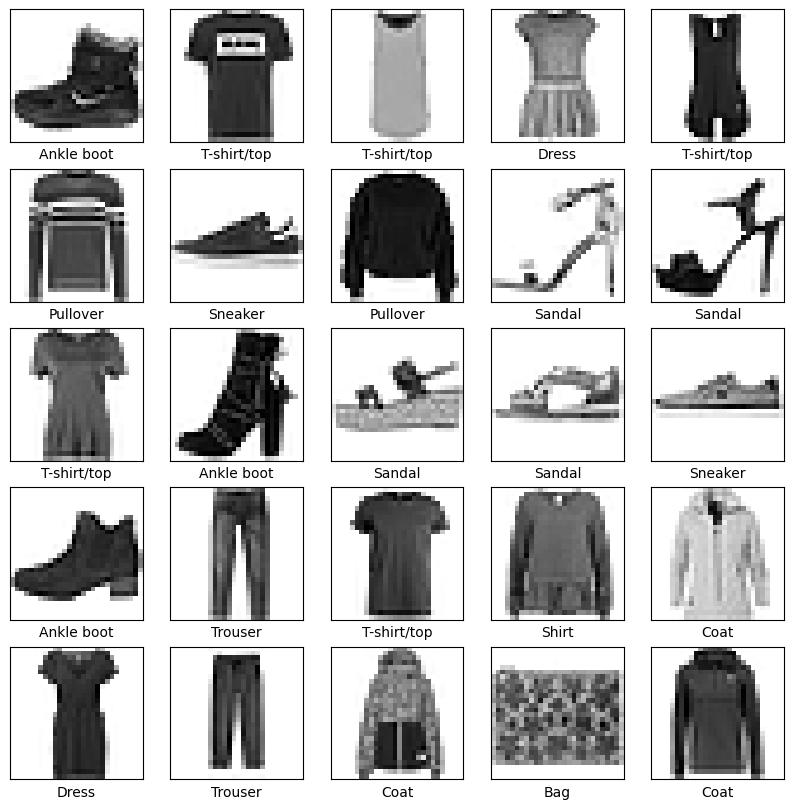

In [52]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #32 FILTERS OF SIZE 3*3" # 28,28 IS INPUT SIZE AND 1 is the colour channel --> greyscale
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Remove the re-initialization of the model, as it overwrites the CNN layers
# model = models.Sequential() # This line is removed
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [56]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics =["accuracy"])


In [58]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.7551 - loss: 0.6929 - val_accuracy: 0.8677 - val_loss: 0.3714
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.8785 - loss: 0.3344 - val_accuracy: 0.8875 - val_loss: 0.3088
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.8947 - loss: 0.2845 - val_accuracy: 0.8944 - val_loss: 0.2927
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9080 - loss: 0.2440 - val_accuracy: 0.8908 - val_loss: 0.3087
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9191 - loss: 0.2191 - val_accuracy: 0.8985 - val_loss: 0.2874
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9224 - loss: 0.2040 - val_accuracy: 0.9009 - val_loss: 0.2746
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9326 - loss: 0.1826 - val_accuracy: 0.9076 - val_loss: 0.2801
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9363 -

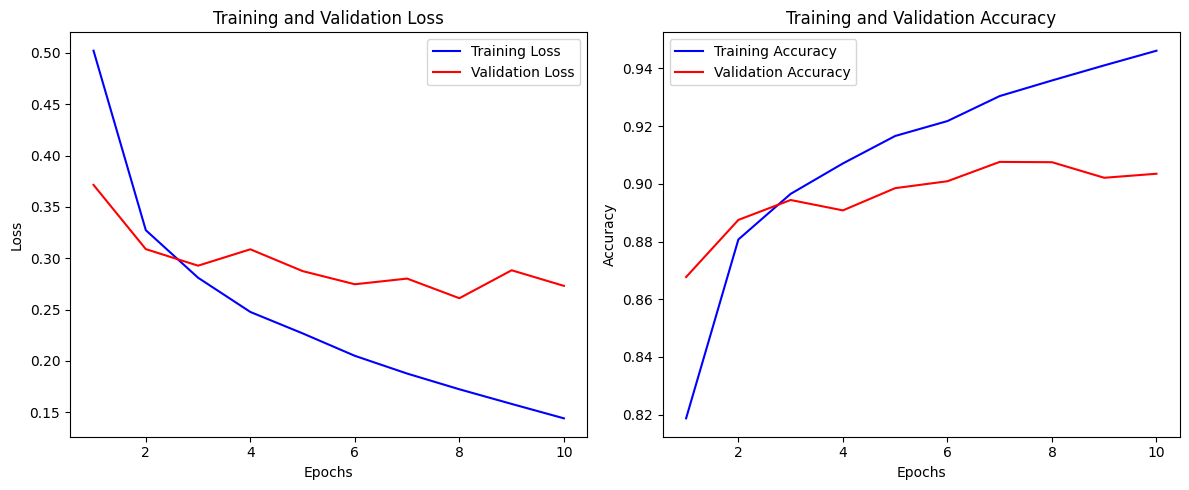

In [59]:
import matplotlib.pyplot as plt

# Get training history data
epochs = range(1, len(history.history['loss']) + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

313/313 - 3s - 9ms/step - accuracy: 0.9035 - loss: 0.2730

Test accuracy: 0.9035000205039978
Test loss: 0.2730254828929901


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


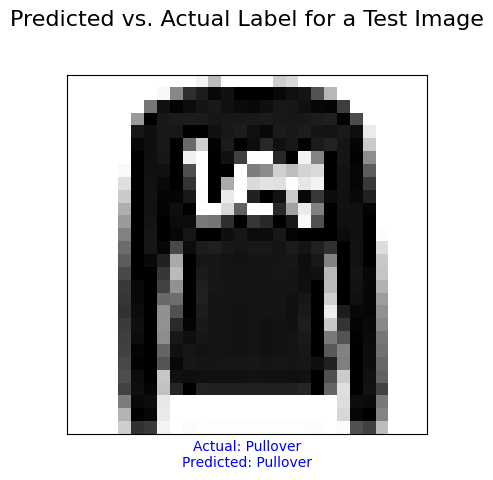

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on a subset of the test images
num_test_images = 1  # Display only one image
# Changed to pick the second image from the test set (index 1)
sample_test_images = test_images[1:2]
sample_test_labels = test_labels[1:2]

predictions = model.predict(sample_test_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(5, 5))
for i in range(num_test_images):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_test_images[i], cmap=plt.cm.binary)

    actual_label = class_names[sample_test_labels[i]]
    predicted_label = class_names[predicted_labels[i]]

    color = 'blue' if predicted_label == actual_label else 'red'
    plt.xlabel(f"Actual: {actual_label}\nPredicted: {predicted_label}", color=color)
plt.suptitle('Predicted vs. Actual Label for a Test Image', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()